In [368]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import random
# from d2l import torch as d2l

In [369]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [370]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [371]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23
# 
print(data.shape)

(368, 40)


In [372]:
features = data.iloc[:, :39]
least_signifant_features = [11, 24, 35]
features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
labels = data.iloc[:, 39:]
print(features.shape)

(368, 36)


In [373]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [374]:
# mini batch iteration
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    # randomly selecting 
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [375]:
# hyperparams
num_hidden_neurons = 100
epochs = 300
learning_rate = .01

In [376]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 1, 36)

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7633; Accuracy: 52.56 %
Epoch: 50/300; Loss: 0.5778; Accuracy: 66.76 %
Epoch: 100/300; Loss: 0.2581; Accuracy: 91.19 %
Epoch: 150/300; Loss: 0.1299; Accuracy: 96.59 %
Epoch: 200/300; Loss: 0.0643; Accuracy: 99.15 %
Epoch: 250/300; Loss: 0.0210; Accuracy: 100.00 %


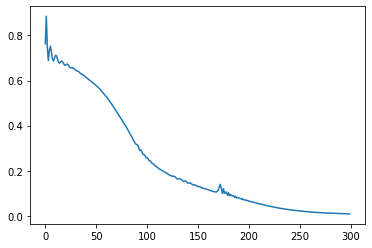

tensor(2.7787, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.8263; Accuracy: 47.16 %
Epoch: 50/300; Loss: 0.6230; Accuracy: 62.50 %
Epoch: 100/300; Loss: 0.3428; Accuracy: 86.93 %
Epoch: 150/300; Loss: 0.0634; Accuracy: 99.15 %
Epoch: 200/300; Loss: 0.0092; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0036; Accurac

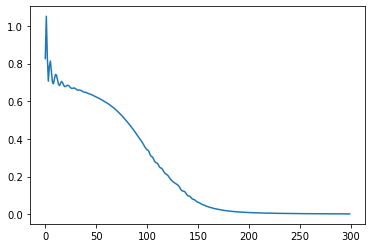

tensor(7.1487, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 22.22 %; correct: 2; wrong: 7;
Test accuracy no-doubt: 42.86 %; correct: 3; wrong: 4;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7015; Accuracy: 52.16 %
Epoch: 50/300; Loss: 0.4925; Accuracy: 77.52 %
Epoch: 100/300; Loss: 0.0998; Accuracy: 97.69 %
Epoch: 150/300; Loss: 0.0078; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0023; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0012; Accur

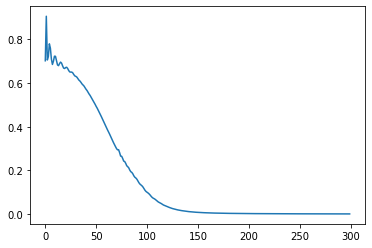

tensor(2.3124, grad_fn=<NllLossBackward>)
Test accuracy total: 71.43 %; correct: 15; wrong: 6;
Test accuracy doubt: 66.67 %; correct: 6; wrong: 3;
Test accuracy no-doubt: 75.00 %; correct: 9; wrong: 3;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7872; Accuracy: 48.42 %
Epoch: 50/300; Loss: 0.6128; Accuracy: 64.76 %
Epoch: 100/300; Loss: 0.3465; Accuracy: 84.24 %
Epoch: 150/300; Loss: 0.1659; Accuracy: 93.98 %
Epoch: 200/300; Loss: 0.0529; Accuracy: 99.43 %
Epoch: 250/300; Loss: 0.0133; Accurac

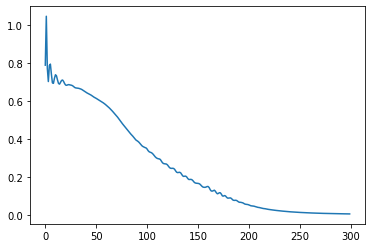

tensor(2.0785, grad_fn=<NllLossBackward>)
Test accuracy total: 78.95 %; correct: 15; wrong: 4;
Test accuracy doubt: 100.00 %; correct: 6; wrong: 0;
Test accuracy no-doubt: 69.23 %; correct: 9; wrong: 4;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6929; Accuracy: 50.28 %
Epoch: 50/300; Loss: 0.4983; Accuracy: 74.43 %
Epoch: 100/300; Loss: 0.2008; Accuracy: 91.76 %
Epoch: 150/300; Loss: 0.0821; Accuracy: 98.01 %
Epoch: 200/300; Loss: 0.0326; Accuracy: 99.43 %
Epoch: 250/300; Loss: 0.0115; Accura

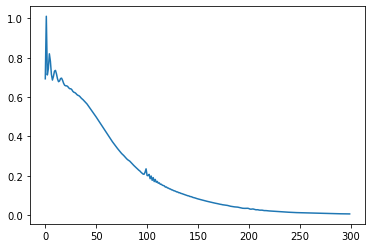

tensor(6.0464, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 50.00 %; correct: 5; wrong: 5;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7265; Accuracy: 47.58 %
Epoch: 50/300; Loss: 0.5871; Accuracy: 67.24 %
Epoch: 100/300; Loss: 0.2766; Accuracy: 88.60 %
Epoch: 150/300; Loss: 0.0455; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0086; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0035; Accura

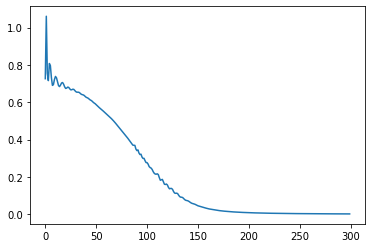

tensor(3.2960, grad_fn=<NllLossBackward>)
Test accuracy total: 58.82 %; correct: 10; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 4; wrong: 4;
Test accuracy no-doubt: 66.67 %; correct: 6; wrong: 3;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6946; Accuracy: 47.67 %
Epoch: 50/300; Loss: 0.6451; Accuracy: 62.21 %
Epoch: 100/300; Loss: 0.5284; Accuracy: 74.42 %
Epoch: 150/300; Loss: 0.3009; Accuracy: 87.79 %
Epoch: 200/300; Loss: 0.1459; Accuracy: 95.06 %
Epoch: 250/300; Loss: 0.0488; Accurac

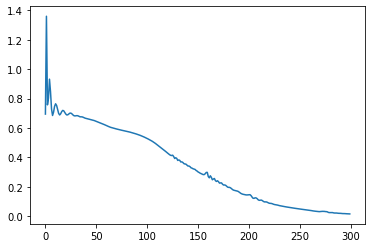

tensor(3.5739, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 12; wrong: 12;
Test accuracy doubt: 41.67 %; correct: 5; wrong: 7;
Test accuracy no-doubt: 58.33 %; correct: 7; wrong: 5;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7051; Accuracy: 52.11 %
Epoch: 50/300; Loss: 0.6244; Accuracy: 63.38 %
Epoch: 100/300; Loss: 0.3793; Accuracy: 85.07 %
Epoch: 150/300; Loss: 0.1186; Accuracy: 96.90 %
Epoch: 200/300; Loss: 0.0248; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0069; Accur

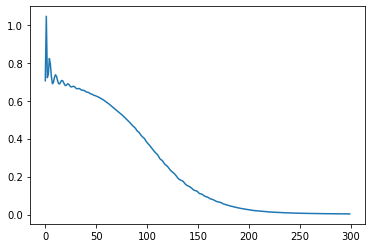

tensor(5.3230, grad_fn=<NllLossBackward>)
Test accuracy total: 46.15 %; correct: 6; wrong: 7;
Test accuracy doubt: 60.00 %; correct: 3; wrong: 2;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6941; Accuracy: 51.16 %
Epoch: 50/300; Loss: 0.5387; Accuracy: 71.10 %
Epoch: 100/300; Loss: 0.2696; Accuracy: 89.88 %
Epoch: 150/300; Loss: 0.0736; Accuracy: 97.98 %
Epoch: 200/300; Loss: 0.0133; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0036; Accurac

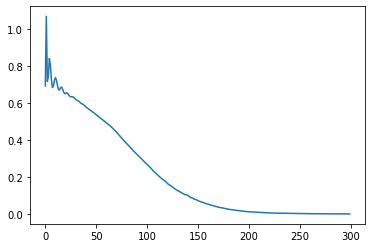

tensor(4.0452, grad_fn=<NllLossBackward>)
Test accuracy total: 72.73 %; correct: 16; wrong: 6;
Test accuracy doubt: 80.00 %; correct: 4; wrong: 1;
Test accuracy no-doubt: 70.59 %; correct: 12; wrong: 5;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7019; Accuracy: 53.03 %
Epoch: 50/300; Loss: 0.5299; Accuracy: 73.49 %
Epoch: 100/300; Loss: 0.2261; Accuracy: 93.08 %
Epoch: 150/300; Loss: 0.0294; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0058; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0026; Accu

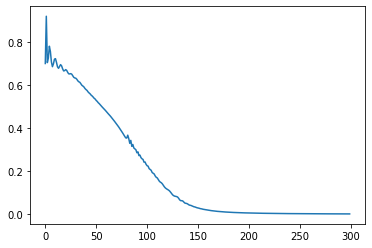

tensor(2.1876, grad_fn=<NllLossBackward>)
Test accuracy total: 66.67 %; correct: 14; wrong: 7;
Test accuracy doubt: 58.33 %; correct: 7; wrong: 5;
Test accuracy no-doubt: 77.78 %; correct: 7; wrong: 2;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6899; Accuracy: 52.84 %
Epoch: 50/300; Loss: 0.5961; Accuracy: 63.07 %
Epoch: 100/300; Loss: 0.3729; Accuracy: 83.24 %
Epoch: 150/300; Loss: 0.1465; Accuracy: 95.45 %
Epoch: 200/300; Loss: 0.0292; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0085; Accura

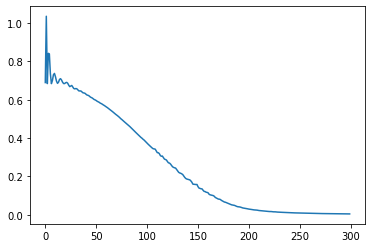

tensor(4.3495, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 10; wrong: 6;
Test accuracy doubt: 55.56 %; correct: 5; wrong: 4;
Test accuracy no-doubt: 71.43 %; correct: 5; wrong: 2;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7006; Accuracy: 47.89 %
Epoch: 50/300; Loss: 0.5377; Accuracy: 69.01 %
Epoch: 100/300; Loss: 0.2346; Accuracy: 91.83 %
Epoch: 150/300; Loss: 0.0250; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0052; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0024; Accur

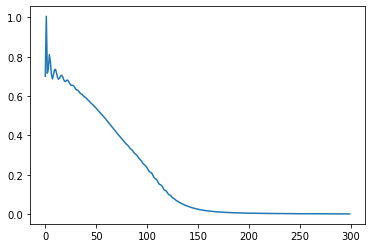

tensor(3.5523, grad_fn=<NllLossBackward>)
Test accuracy total: 76.92 %; correct: 10; wrong: 3;
Test accuracy doubt: 80.00 %; correct: 4; wrong: 1;
Test accuracy no-doubt: 75.00 %; correct: 6; wrong: 2;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7646; Accuracy: 46.26 %
Epoch: 50/300; Loss: 0.5062; Accuracy: 76.44 %
Epoch: 100/300; Loss: 0.0928; Accuracy: 98.28 %
Epoch: 150/300; Loss: 0.0075; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0024; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0013; Accur

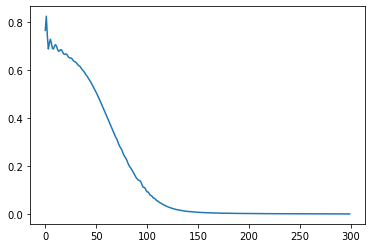

tensor(3.0023, grad_fn=<NllLossBackward>)
Test accuracy total: 65.00 %; correct: 13; wrong: 7;
Test accuracy doubt: 57.14 %; correct: 8; wrong: 6;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 1.4260; Accuracy: 53.03 %
Epoch: 50/300; Loss: 0.6592; Accuracy: 57.93 %
Epoch: 100/300; Loss: 0.5558; Accuracy: 70.89 %
Epoch: 150/300; Loss: 0.3387; Accuracy: 85.30 %
Epoch: 200/300; Loss: 0.1309; Accuracy: 96.83 %
Epoch: 250/300; Loss: 0.0360; Accurac

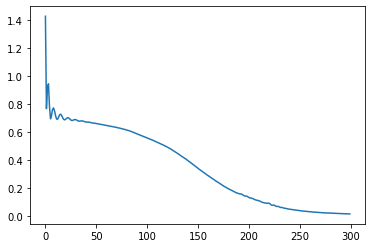

tensor(3.2691, grad_fn=<NllLossBackward>)
Test accuracy total: 57.14 %; correct: 12; wrong: 9;
Test accuracy doubt: 58.33 %; correct: 7; wrong: 5;
Test accuracy no-doubt: 55.56 %; correct: 5; wrong: 4;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7335; Accuracy: 47.59 %
Epoch: 50/300; Loss: 0.5920; Accuracy: 65.16 %
Epoch: 100/300; Loss: 0.2798; Accuracy: 89.80 %
Epoch: 150/300; Loss: 0.0836; Accuracy: 98.58 %
Epoch: 200/300; Loss: 0.0186; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0057; Accura

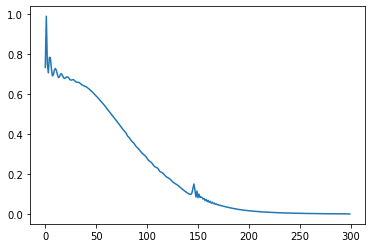

tensor(4.8912, grad_fn=<NllLossBackward>)
Test accuracy total: 53.33 %; correct: 8; wrong: 7;
Test accuracy doubt: 42.86 %; correct: 3; wrong: 4;
Test accuracy no-doubt: 62.50 %; correct: 5; wrong: 3;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.8150; Accuracy: 47.70 %
Epoch: 50/300; Loss: 0.4906; Accuracy: 76.44 %
Epoch: 100/300; Loss: 0.1533; Accuracy: 95.98 %
Epoch: 150/300; Loss: 0.0206; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0042; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0020; Accura

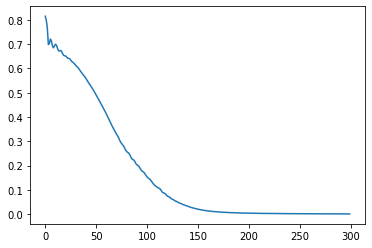

tensor(4.0322, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 10; wrong: 10;
Test accuracy doubt: 44.44 %; correct: 4; wrong: 5;
Test accuracy no-doubt: 54.55 %; correct: 6; wrong: 5;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6928; Accuracy: 52.79 %
Epoch: 50/300; Loss: 0.5687; Accuracy: 69.55 %
Epoch: 100/300; Loss: 0.3122; Accuracy: 87.15 %
Epoch: 150/300; Loss: 0.1151; Accuracy: 96.93 %
Epoch: 200/300; Loss: 0.0416; Accuracy: 98.60 %
Epoch: 250/300; Loss: 0.0175; Accura

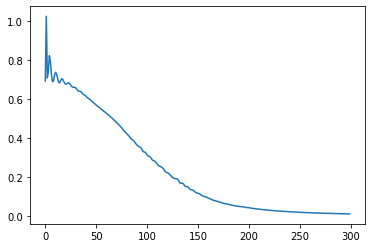

tensor(5.5816, grad_fn=<NllLossBackward>)
Test accuracy total: 30.00 %; correct: 3; wrong: 7;
Test accuracy doubt: 33.33 %; correct: 2; wrong: 4;
Test accuracy no-doubt: 25.00 %; correct: 1; wrong: 3;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7116; Accuracy: 48.67 %
Epoch: 50/300; Loss: 0.4958; Accuracy: 73.45 %
Epoch: 100/300; Loss: 0.1391; Accuracy: 95.87 %
Epoch: 150/300; Loss: 0.0149; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0034; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0016; Accura

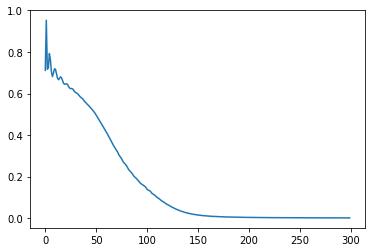

tensor(4.5354, grad_fn=<NllLossBackward>)
Test accuracy total: 44.83 %; correct: 13; wrong: 16;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 47.37 %; correct: 9; wrong: 10;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 1.1468; Accuracy: 53.18 %
Epoch: 50/300; Loss: 0.6249; Accuracy: 65.61 %
Epoch: 100/300; Loss: 0.4264; Accuracy: 79.77 %
Epoch: 150/300; Loss: 0.1700; Accuracy: 93.93 %
Epoch: 200/300; Loss: 0.0269; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0057; Accu

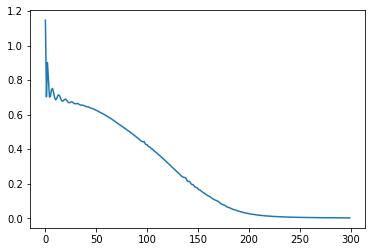

tensor(2.9144, grad_fn=<NllLossBackward>)
Test accuracy total: 63.64 %; correct: 14; wrong: 8;
Test accuracy doubt: 53.85 %; correct: 7; wrong: 6;
Test accuracy no-doubt: 77.78 %; correct: 7; wrong: 2;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6994; Accuracy: 51.73 %
Epoch: 50/300; Loss: 0.6438; Accuracy: 61.27 %
Epoch: 100/300; Loss: 0.4463; Accuracy: 82.37 %
Epoch: 150/300; Loss: 0.1507; Accuracy: 95.38 %
Epoch: 200/300; Loss: 0.0252; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0062; Accura

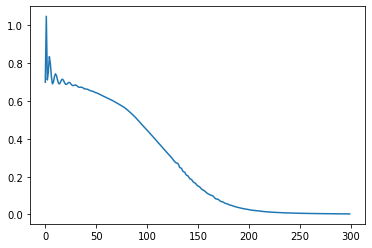

tensor(3.6475, grad_fn=<NllLossBackward>)
Test accuracy total: 59.09 %; correct: 13; wrong: 9;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 57.14 %; correct: 8; wrong: 6;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7150; Accuracy: 47.16 %
Epoch: 50/300; Loss: 0.6042; Accuracy: 67.05 %
Epoch: 100/300; Loss: 0.3151; Accuracy: 84.94 %
Epoch: 150/300; Loss: 0.0942; Accuracy: 97.73 %
Epoch: 200/300; Loss: 0.0265; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0086; Accura

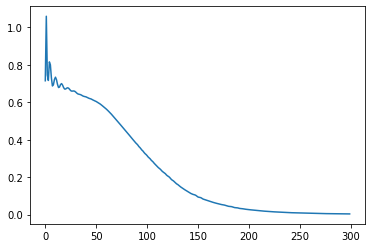

tensor(5.9709, grad_fn=<NllLossBackward>)
Test accuracy total: 37.50 %; correct: 6; wrong: 10;
Test accuracy doubt: 33.33 %; correct: 3; wrong: 6;
Test accuracy no-doubt: 42.86 %; correct: 3; wrong: 4;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.6940; Accuracy: 51.86 %
Epoch: 50/300; Loss: 0.5772; Accuracy: 67.05 %
Epoch: 100/300; Loss: 0.3412; Accuracy: 83.95 %
Epoch: 150/300; Loss: 0.1755; Accuracy: 95.13 %
Epoch: 200/300; Loss: 0.0915; Accuracy: 96.85 %
Epoch: 250/300; Loss: 0.0392; Accurac

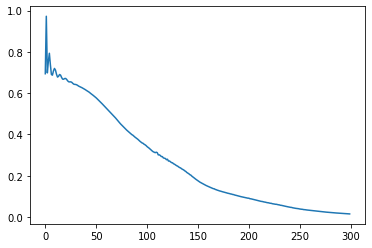

tensor(3.8162, grad_fn=<NllLossBackward>)
Test accuracy total: 63.16 %; correct: 12; wrong: 7;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 90.91 %; correct: 10; wrong: 1;

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])
Epoch: 0/300; Loss: 0.7188; Accuracy: 52.19 %
Epoch: 50/300; Loss: 0.5464; Accuracy: 72.01 %
Epoch: 100/300; Loss: 0.2472; Accuracy: 90.38 %
Epoch: 150/300; Loss: 0.0760; Accuracy: 98.25 %
Epoch: 200/300; Loss: 0.0191; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0064; Accur

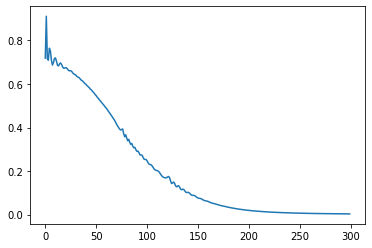

tensor(5.0058, grad_fn=<NllLossBackward>)
Test accuracy total: 52.00 %; correct: 13; wrong: 12;
Test accuracy doubt: 27.27 %; correct: 3; wrong: 8;
Test accuracy no-doubt: 71.43 %; correct: 10; wrong: 4;



In [377]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):
    # need to drop the 3 least significant columns to improve effciency
    features = data.iloc[:, :39]
    least_signifant_features = [11, 24, 35]
    features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
    labels = data.iloc[:, 39:]
    msk = np.random.rand(len(data)) < 0.95
    features_train_df = features[msk]
    labels_train_df = labels[msk]
    features_test_df = features[~msk]
    labels_test_df = labels[~msk]
    X_train = torch.tensor(np.reshape(features_train_df.to_numpy(), (features_train_df.shape[0], 1, 36)), dtype=torch.double).float()
    Y_train = torch.tensor(labels_train_df.to_numpy(), dtype=torch.double)
    Y_train = Y_train.reshape((Y_train.shape[0],))
# features.shape, labels.shape
    X_test = torch.tensor(np.reshape(features_test_df.to_numpy(), (features_test_df.shape[0], 1, 36)), dtype=torch.double).float()
    Y_test = torch.tensor(labels_test_df.to_numpy(), dtype=torch.double)
    Y_test = Y_test.reshape((Y_test.shape[0]))

    net = nn.Sequential(Reshape(),
                    nn.Conv2d(1, 6, kernel_size=(1, 3), padding=(0, 1)),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=(1, 2), stride=2),
                    nn.Conv2d(6, 16, kernel_size=(1, 5), padding=(0, 2)),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=(1, 3), stride=3),
                    nn.Flatten(),
                    nn.Linear(16*1*6, 100),
                    nn.Sigmoid(),
                    nn.Linear(100, 2),
                    )

    # X = torch.rand(size=(1, 1, 1, 36), dtype=torch.float32)
    # for layer in net:
    #     X = layer(X)
    #     print(layer.__class__.__name__, 'output shape: \t', X.shape)

    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # use crossentropy loss and adam for optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        Y_train_pred = Y_train_pred.float()
        loss = loss_func(Y_train_pred, Y_train.long())
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        net.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    # X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    # Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    Y_test_pred = Y_test_pred.float()
    loss = loss_func(Y_test_pred, Y_test.long())
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [378]:
    X = torch.rand(size=(1, 1, 1, 36), dtype=torch.float32)
    for layer in net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])


In [379]:
print(*[(name, param.shape) for name, param in net.named_parameters()])
# weight_input2hidden = np.absolute(net.state_dict()['1.weight'].data.numpy())
# weight_hidden2output = np.absolute(net.state_dict()['3.weight'].data.numpy())
# weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
# weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# # calculate the Q weight matrix
# Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
# np.argsort(Q)

('1.weight', torch.Size([6, 1, 1, 3])) ('1.bias', torch.Size([6])) ('4.weight', torch.Size([16, 6, 1, 5])) ('4.bias', torch.Size([16])) ('8.weight', torch.Size([100, 96])) ('8.bias', torch.Size([100])) ('10.weight', torch.Size([2, 100])) ('10.bias', torch.Size([2]))


In [380]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.564
Doubt accuracy: 0.524
Trust accuracy: 0.614


In [381]:
# save selected pupil data
# data.to_csv('pupillary_dilation.csv', index=False)